<a href="https://colab.research.google.com/github/Srinivas-Dasathwar/Pattern-Recognition-Practicals/blob/main/PR_Practical_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.15, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None
        self.cost_history = []

    def compute_cost(self, X, y):
        m = len(y)
        predictions = X.dot(self.theta)
        cost = (1/(2*m)) * np.sum((predictions - y)**2)
        return cost

    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]
        self.theta = np.zeros((n+1, 1))
        y = y.reshape(m, 1)

        for _ in range(self.iterations):
            predictions = X_b.dot(self.theta)
            errors = predictions - y
            gradients = (1/m) * X_b.T.dot(errors)
            self.theta -= self.learning_rate * gradients
            self.cost_history.append(self.compute_cost(X_b, y))

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)


In [ ]:
model = LinearRegressionGD(learning_rate=0.01, iterations=1000)
model.fit(X, y)
print(f'Final parameters (theta): \n{model.theta}')

Final parameters (theta): 
[[4.03321421]
 [2.93070525]]


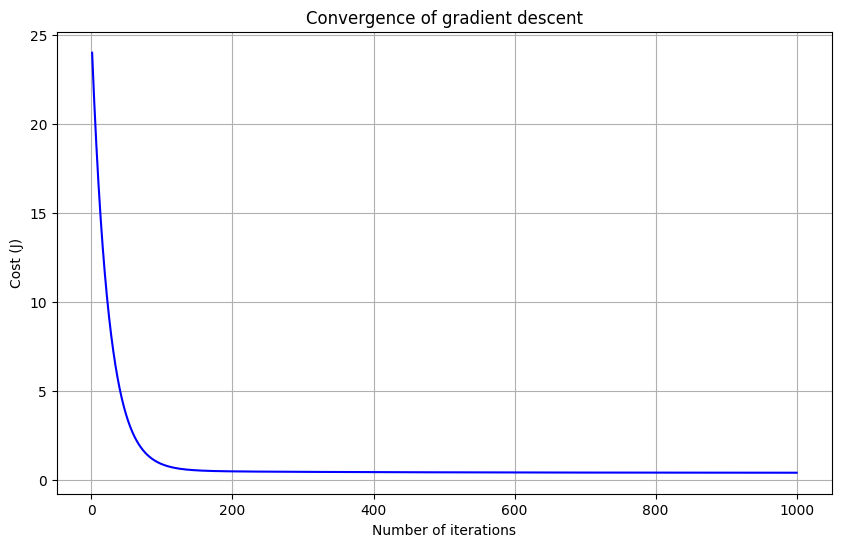

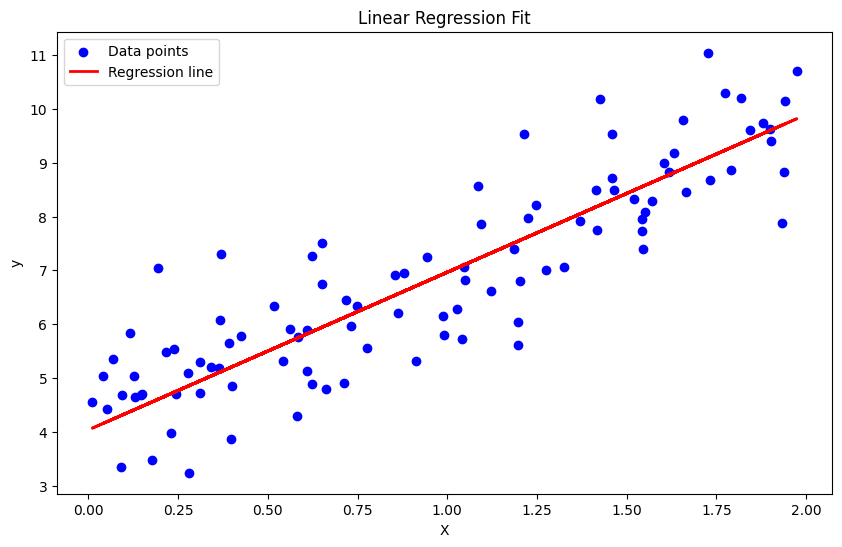

In [ ]:
plt.plot(range(1, model.iterations + 1), model.cost_history, color='blue')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.grid()
plt.show()
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()